In [2]:
import pandas as pd
import glob
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

# set column width to be able to see full text
pd.set_option('display.max_colwidth', 100)

model_rankings = 'monoT5'

base_path = f'../indexing/results/{model_rankings}/'
# all_model_dirs = glob.glob(f'../indexing/results/{model_rankings}/*')
all_model_csvs = glob.glob(f'{base_path}/*.csv')
plot_path = f'./plots'
if not os.path.exists(plot_path):
    os.makedirs(plot_path)

In [3]:
number_of_answers = 10

model_dfs = []
for model_csv in all_model_csvs:
    df = pd.read_csv(model_csv)
    model_name = model_csv.split("/")[-1].split(".")[0].replace("_rankings", "")
    df["model"] = model_name
    model_dfs.append(df)

all_model_df = pd.concat(model_dfs, ignore_index=True)
all_model_df['is_natural_question'] = all_model_df['query'].str.endswith('?')
all_model_df['weighted_position'] = 1 - all_model_df['weighted_position']

In [4]:
all_model_df.describe()

,qid,score,rank,answer_number,weighted_position,num_answer_words,num_matching_words
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,86.040000,-4.558891,49.392688,5.500000,0.708629,228.882187,10.391750
std,32.340436,5.467277,67.260172,2.872371,0.363398,126.610634,15.960082
min,1.000000,-15.175696,0.000000,1.000000,0.004000,1.000000,0.000000
25%,59.000000,-10.558289,0.000000,3.000000,0.384615,117.000000,1.000000
50%,93.500000,-0.294940,8.000000,5.500000,0.950673,237.000000,5.000000
75%,113.000000,-0.009833,89.000000,8.000000,1.000000,331.000000,14.000000
max,132.000000,-0.000891,249.000000,10.000000,1.000000,512.000000,410.000000


In [5]:
# replace na answers with empty string
all_model_df['text'] = all_model_df['text'].fillna('')

In [6]:
all_model_df.qid.unique().size

50

In [7]:

# list natural question and non-natural question queries
natural_question_queries = all_model_df[all_model_df['is_natural_question']]['query'].unique()
non_natural_question_queries = all_model_df[~all_model_df['is_natural_question']]['query'].unique()

natural_question_queries, non_natural_question_queries

(array(['Why get episode diagnosed by a doctor as a relapse of multiple sclerosis?',
        'Can I work and study full-time with multiple sclerosis?',
        'How do menopause symptoms relate to multiple sclerosis symptoms?',
        'What are the most common chronic diseases? What effects do chronic diseases have for the society and the individual?',
        'disclosing multiple sclerosis at work, how will colleagues react?',
        'Is a ketogenic / keto diet suitable for people with diabetes?',
        'When will I start to feel better with multiple sclerosis?',
        'Will multiple sclerosis affect my career?',
        'What does multiple sclerosis diagnosis include? What does it change?',
        'What are the most common mental health problems? How can I prevent or manage the most common mental health problems?',
        'What is holistic medicine and what does it include?',
        'How to manage multiple sclerosis?',
        'Does multiple sclerosis relate to sleeping prob

In [8]:
all_model_df['model'].unique()

array(['tiiuae_falcon-7b-instruct', 'gpt2-xl', 'gpt2-medium', 'gpt2',
       'chatgpt', 'meta-llama_Llama-2-13b-chat-hf', 'gpt2-large',
       'meta-llama_Llama-2-7b-chat-hf'], dtype=object)

In [9]:
# rename models to more readable names
names_dict = {
    "gpt2": "GPT-2",
    "gpt2-medium": "GPT-2 M",
    "gpt2-large": "GPT-2 L",
    "gpt2-xl": "GPT-2 XL",
    "tiiuae_falcon-7b-instruct": "Falcon 7B",  #
    "meta-llama_Llama-2-7b-chat-hf": "Llama-2 7B",
    "meta-llama_Llama-2-13b-chat-hf": "Llama-2 13B",
    "chatgpt": "ChatGPT"
}
# define colors for models, different shades of same color for different sizes
# gpt2 blue, falcon orange, llama green, chatgpt red
# large models are darker
color_dict = {
    "GPT-2": sns.color_palette("Blues")[0],
    "GPT-2 M": sns.color_palette("Blues")[1],
    "GPT-2 L": sns.color_palette("Blues")[2],
    "GPT-2 XL": sns.color_palette("Blues")[3],
    "Falcon 7B": sns.color_palette("Oranges")[4],
    "Llama-2 7B": sns.color_palette("Greens")[1],
    "Llama-2 13B": sns.color_palette("Greens")[4],
    "ChatGPT": sns.color_palette("Reds")[4]
}

all_model_df['model'] = all_model_df['model'].replace(names_dict)
# order models
order = [
    "GPT-2",
    "GPT-2 M",
    "GPT-2 L",
    "GPT-2 XL",
    "Falcon 7B",
    "Llama-2 7B",
    "Llama-2 13B",
    "ChatGPT",
]
all_model_df['model'] = pd.Categorical(all_model_df['model'], order)


In [10]:
all_model_df[all_model_df["prompt"] == "multimedqa"]

,docno,text,qid,query,score,rank,prompt,answer_number,weighted_position,num_answer_words,num_matching_words,model,is_natural_question
0,tiiuae_falcon-7b-instruct_112,"Asthma is a chronic respiratory condition that can cause wheezing, coughing, and difficulty brea...",112,symptoms of asthma,-0.147644,4,multimedqa,1,0.980952,66,7,Falcon 7B,False
1,tiiuae_falcon-7b-instruct_109,Ehlers-Danlos syndrome (EDS) is a group of genetic disorders that affect connective tissues in t...,109,ehlers danlos syndrome POTS nausea stomach pain,-0.022190,0,multimedqa,1,1.000000,83,2,Falcon 7B,False
2,tiiuae_falcon-7b-instruct_83,Multiple sclerosis is a complex disease that can have various symptoms that can mimic other cond...,83,Why get episode diagnosed by a doctor as a relapse of multiple sclerosis?,-4.668453,86,multimedqa,1,0.632479,218,29,Falcon 7B,True
3,tiiuae_falcon-7b-instruct_118,Stage 4 triple negative breast cancer (TNBC) is a challenging disease to treat due to its aggres...,118,stage 4 triple negative breast cancer treatment,-0.003483,0,multimedqa,1,1.000000,223,13,Falcon 7B,False
4,tiiuae_falcon-7b-instruct_81,"It is possible for individuals with multiple sclerosis to work and study full-time. However, it ...",81,Can I work and study full-time with multiple sclerosis?,-0.004075,0,multimedqa,1,1.000000,254,35,Falcon 7B,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14495,meta-llama_Llama-2-7b-chat-hf_53,"Psychotherapy, also known as talk therapy or counseling, is a type of treatment that involves ta...",53,what is psychotherapy?,-0.055764,0,multimedqa,10,1.000000,156,2,Llama-2 7B,True
14496,meta-llama_Llama-2-7b-chat-hf_108,"Chronic diarrhea, short-term memory loss, excessive sweating, difficulty regulating body tempera...",108,chronic diarrhea short-term memory sweating inability to regulate body temperature heart palpita...,-0.037496,0,multimedqa,10,1.000000,277,12,Llama-2 7B,False
14497,meta-llama_Llama-2-7b-chat-hf_45,"Diabetes is a chronic condition that cannot be completely cured, but it can be managed through l...",45,Can diabetes be cured?,-0.010085,1,multimedqa,10,0.992063,217,14,Llama-2 7B,True
14498,meta-llama_Llama-2-7b-chat-hf_119,"\nNeck pain is a common condition that can be caused by a variety of factors, including poor pos...",119,best pillow neck pain,-0.003439,0,multimedqa,10,1.000000,177,15,Llama-2 7B,False


In [11]:
all_model_df.groupby(["qid", "model"])["weighted_position"].describe()

/var/folders/mg/9fvwbp_55gnckml5gbgv26900000gn/T/ipykernel_1848/2552791741.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_model_df.groupby(["qid", "model"])["weighted_position"].describe()


count      mean       std       min       25%       50%  \
qid model                                                                  
1   GPT-2         40.0  0.722347  0.245340  0.081633  0.567347  0.777551   
    GPT-2 M       40.0  0.687653  0.281180  0.179592  0.425510  0.685714   
    GPT-2 L       40.0  0.941122  0.144307  0.248980  0.971429  0.991837   
    GPT-2 XL      40.0  0.894082  0.184831  0.395918  0.954082  0.979592   
    Falcon 7B     40.0  1.000000  0.000000  1.000000  1.000000  1.000000   
...                ...       ...       ...       ...       ...       ...   
132 GPT-2 XL      40.0  0.624800  0.365902  0.008000  0.294000  0.720000   
    Falcon 7B     40.0  0.755600  0.404285  0.008000  0.662000  1.000000   
    Llama-2 7B    40.0  0.897400  0.218458  0.008000  0.902000  1.000000   
    Llama-2 13B   40.0  0.863200  0.311011  0.008000  0.988000  1.000000   
    ChatGPT       40.0  1.000000  0.000000  1.000000  1.000000  1.000000   

                      75%       max  
qid model                            
1   GPT-2        0.943878  0.983673  
    GPT-2 M      0.976531  1.000000  
    GPT-2 L      0.995918  1.000000  
    GPT-2 XL     0.995918  1.000000  
    Falcon 7B    1.000000  1.000000  
...                   ...       ...  
132 GPT-2 XL     1.000000  1.000000  
    Falcon 7B    1.000000  1.000000  
    Llama-2 7B   1.000000  1.000000  
    Llama-2 13B  1.000000  1.000000  
    ChatGPT      1.000000  1.000000  

[400 rows x 8 columns]

In [12]:
# average the weighted position for each model and query
all_model_df.groupby(["qid", "model", "prompt"])["weighted_position"].mean().reset_index()

/var/folders/mg/9fvwbp_55gnckml5gbgv26900000gn/T/ipykernel_1848/3398509902.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_model_df.groupby(["qid", "model", "prompt"])["weighted_position"].mean().reset_index()


,qid,model,prompt,weighted_position
0,1,GPT-2,multimedqa,0.832245
1,1,GPT-2,no_prompt,0.518367
2,1,GPT-2,q,0.767347
3,1,GPT-2,question,0.771429
4,1,GPT-2 M,multimedqa,0.616735
...,...,...,...,...
1595,132,Llama-2 13B,question,1.000000
1596,132,ChatGPT,multimedqa,1.000000
1597,132,ChatGPT,no_prompt,1.000000
1598,132,ChatGPT,q,1.000000


/var/folders/mg/9fvwbp_55gnckml5gbgv26900000gn/T/ipykernel_1848/1559156271.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_model_df = all_model_df.groupby(["qid", "model", "prompt"])["weighted_position"].mean().reset_index()


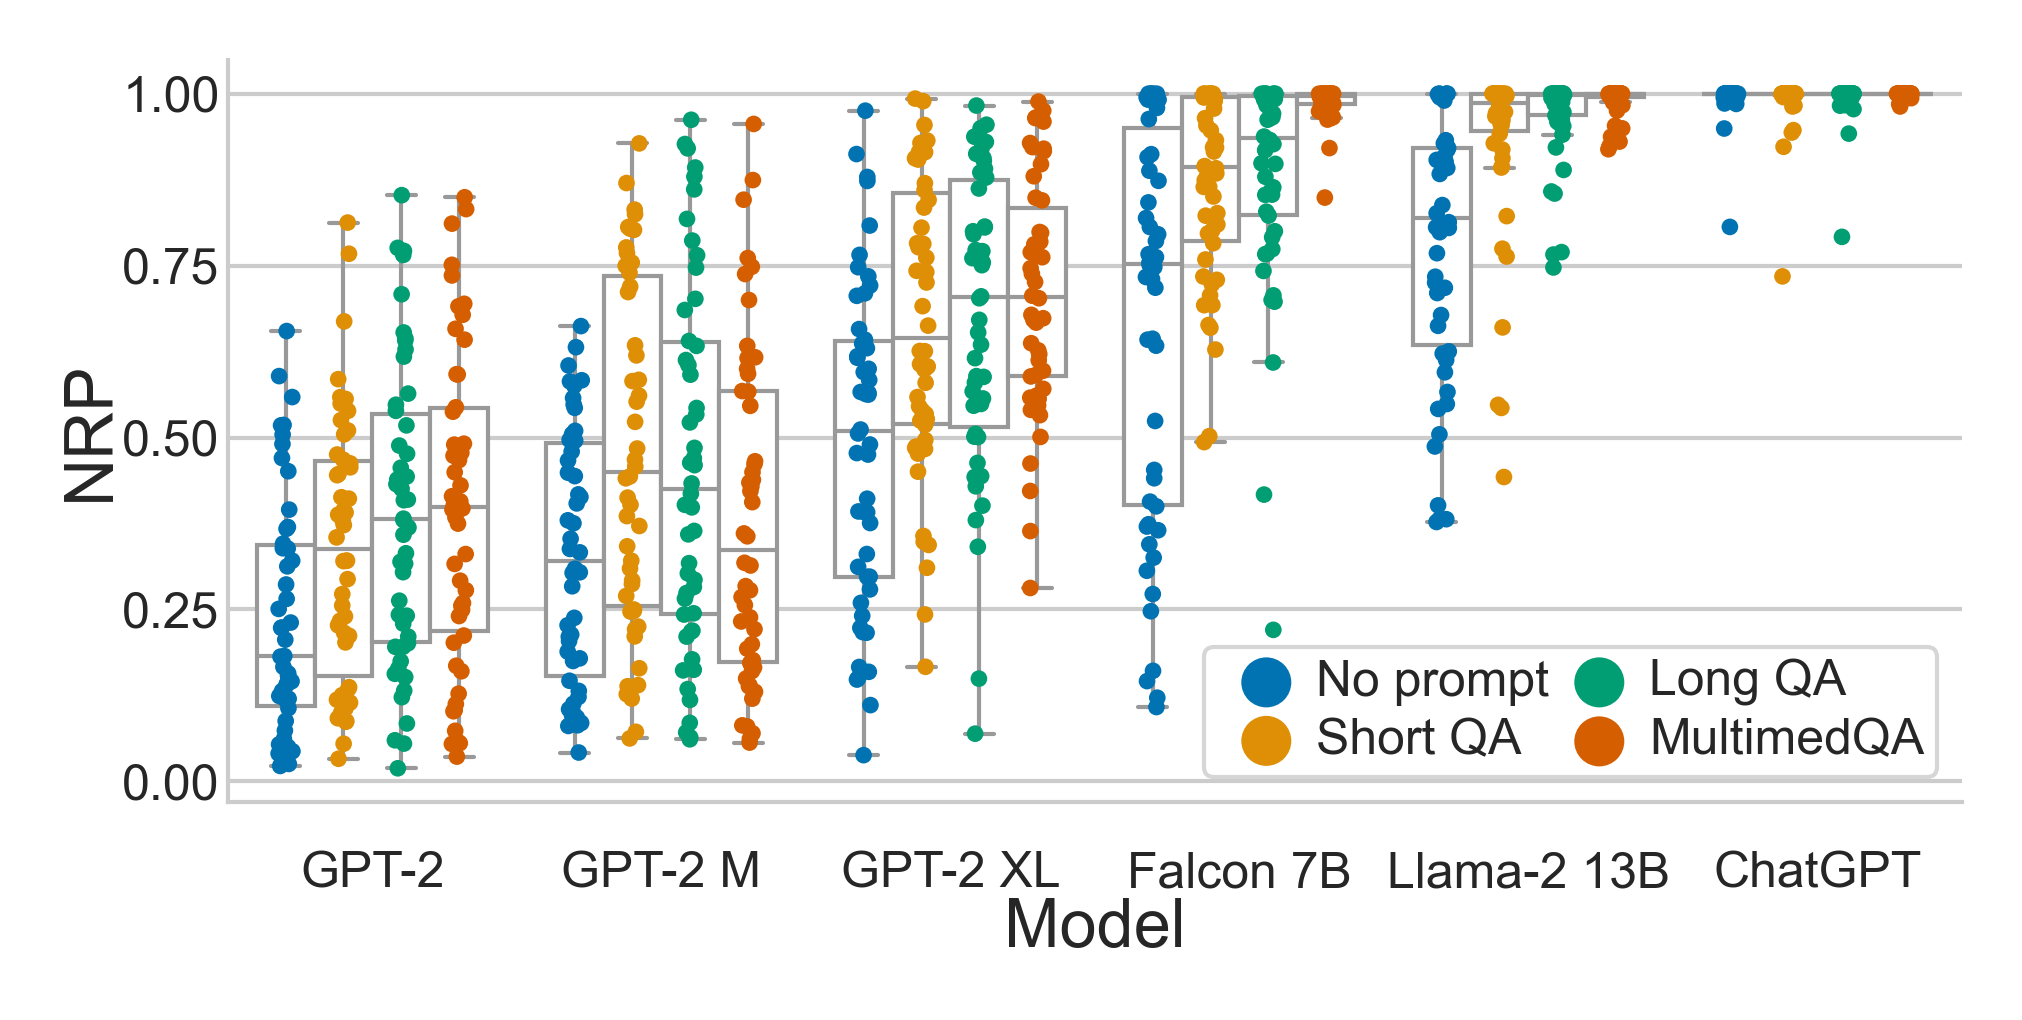

In [57]:
import matplotlib
# boxplot of weighted_position
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

sns.set_theme(style="whitegrid")

# matplotlib.rcParams["text.usetex"] = True
# matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.size"] = "8"

colwidth_pt = 347.12354
dpi = 600

colwidth_inches = colwidth_pt / 72.27

fig, ax = plt.subplots(figsize=(colwidth_inches * .66, 1.5), dpi=dpi)

# average the weighted position for each model and query
avg_model_df = all_model_df.groupby(["qid", "model", "prompt"])["weighted_position"].mean().reset_index()

# Remove all rows where model = "GPT-2 M"  using drop
# avg_model_df = avg_model_df.drop(avg_model_df[(avg_model_df['model'] == 'GPT-2 M')].index)
avg_model_df2 = avg_model_df.drop(avg_model_df[(avg_model_df['model'] == 'GPT-2 L')].index)
avg_model_df2 = avg_model_df2.drop(avg_model_df[(avg_model_df['model'] == 'Llama-2 7B')].index)
avg_model_df2["model"] = avg_model_df2["model"].cat.remove_unused_categories()
# use color_dict to color models
sns.stripplot(ax=ax, x="model", y="weighted_position", data=avg_model_df2, hue="prompt", size=2, dodge=True,
              hue_order=["no_prompt", "q", "question", "multimedqa"], alpha=1, palette="colorblind")
sns.boxplot(ax=ax, x="model", y="weighted_position", data=avg_model_df2, hue="prompt", fliersize=0,
            hue_order=["no_prompt", "q", "question", "multimedqa"], palette=["white", "white", "white", "white"],
            linewidth=0.5)
ax.set_xlabel('Model', labelpad=0)
ax.set_ylabel('NRP',labelpad=0)
sns.despine(top=True, right=True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
ax.xaxis.label.set_size(8)
ax.yaxis.label.set_size(8)
ax.xaxis.set_tick_params(pad=0)
ax.yaxis.set_tick_params(pad=-5)
ax.yaxis.set_ticks(np.arange(0, 1.1, 0.25))
plt.setp(ax.spines.values(), linewidth=0.5)
leg = plt.legend(title="", loc="best", labels=["No prompt", "Short QA", "Long QA", "MultimedQA"], ncols=2,
                 markerscale=3, columnspacing=0, handletextpad=0, borderpad=0.25, labelspacing=.25, fontsize=6)
for lh in leg.legend_handles:
    lh.set_alpha(1)
leg.get_frame().set_linewidth(0.5)
ax.grid(linewidth=0.5, axis='y')
plt.tight_layout(pad=0)
plt.savefig(f'{plot_path}/weighted_position_boxplot.pdf', pad_inches=0)
plt.show()

/var/folders/mg/9fvwbp_55gnckml5gbgv26900000gn/T/ipykernel_1848/2913915720.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model_weighted_position_df = avg_model_df[avg_model_df["prompt"] == "multimedqa"].groupby(['model', 'prompt'])[
/var/folders/mg/9fvwbp_55gnckml5gbgv26900000gn/T/ipykernel_1848/2913915720.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  model_weighted_position_df['model_size'] = model_weighted_position_df['model'].replace(model_size_dict)
/var/folders/mg/9fvwbp_55gnckml5gbgv26900000gn/T/ipykernel_1848/2913915720.py:24: FutureWarning: The beh

GPT-2
GPT-2 M
GPT-2 L
GPT-2 XL
Falcon 7B
Llama-2 7B
Llama-2 13B
ChatGPT


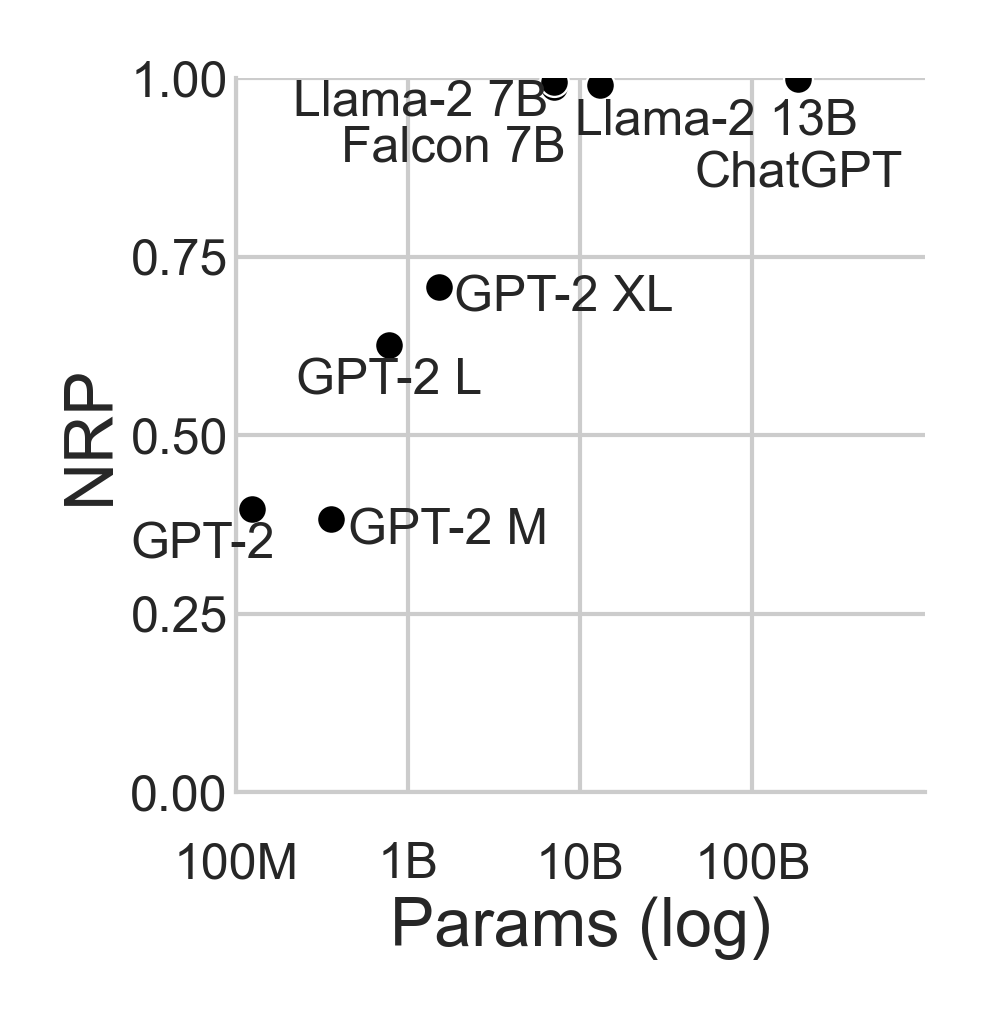

In [67]:
"""
124M
355M
774M
1.5B
7B
7B
13B
185B
"""
# group by model name and get mean weighted position, add model size
model_size_dict = {
    "GPT-2": 124000000,
    "GPT-2 M": 355000000,
    "GPT-2 L": 774000000,
    "GPT-2 XL": 1500000000,
    "Falcon 7B": 7000000000,
    "Llama-2 7B": 7000000000,
    "Llama-2 13B": 13000000000,
    "ChatGPT": 185000000000
}
model_weighted_position_df = avg_model_df[avg_model_df["prompt"] == "multimedqa"].groupby(['model', 'prompt'])[
    'weighted_position'].mean().reset_index()
model_weighted_position_df['model_size'] = model_weighted_position_df['model'].replace(model_size_dict)
model_weighted_position_df = model_weighted_position_df.sort_values(by='model_size')
# model_weighted_position_df = model_weighted_position_df[model_weighted_position_df["prompt"]]

# plot weighted position vs model size, draw line to show the trend
# x axis is log scaled
# model names appear directly above the points
fig, ax = plt.subplots(figsize=(colwidth_inches * .3, 1.5), dpi=dpi)
sns.despine(top=True, right=True)

ax = sns.scatterplot(x="model_size", y="weighted_position", data=model_weighted_position_df, color="black", s=12)

ax.set_xlabel('Params (log)', labelpad=1)
ax.set_ylabel('NRP', labelpad=1)
ax.set_xscale('log')
ax.set_xticks([1e8, 1e9, 1e10, 1e11])
ax.set_xticklabels(['100M', '1B', '10B', '100B'])
ax.set_ylim(0.3, 1)

ax.yaxis.set_ticks(np.arange(0, 1.1, 0.25))

plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

ax.xaxis.label.set_size(8)
ax.yaxis.label.set_size(8)
ax.xaxis.set_tick_params(pad=0)
ax.yaxis.set_tick_params(pad=-5)
leg.get_frame().set_linewidth(0.5)
ax.set_xlim(1e8, 1e12)
positions = {
    "GPT-2": (-6,-6),
    "GPT-2 M": (14,-3),
    "GPT-2 L": (0,-6),
    "GPT-2 XL": (15,-3),
    "Falcon 7B": (-12,-9),
    "Llama-2 7B": (-16,-4),
    "Llama-2 13B": (14,-6),
    "ChatGPT": (0,-13)
}
for i, txt in enumerate(model_weighted_position_df['model']):
    # move llama-2 7B and GPT-2 XL below the point
    print(txt)
    ax.annotate(txt, 
                (model_weighted_position_df['model_size'][i], model_weighted_position_df['weighted_position'][i]),
                xytext=positions[txt], textcoords='offset points', ha='center', fontsize=6)
ax.grid(linewidth=0.5, axis='both')
plt.setp(ax.spines.values(), linewidth=0.5)

plt.tight_layout(pad=0)
plt.savefig(f'{plot_path}/weighted_position_vs_model_size.pdf', pad_inches=0)
plt.show()